<a href="https://colab.research.google.com/github/LeandroCoelhos/BeeData/blob/main/02.life_expectancy/life_expectancy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leandro Coelho <br>
27/05/2023 <br>

<b> BeeData - Life Expectancy </b>

In [318]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

import time
pd.set_option('display.max_columns', None)

In [319]:
df = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/BeeData/main/02.life_expectancy/Life%20Expectancy%20Data.csv')

# Entendendo os dados:


## 

<hr>
Country - cidade
<hr>
Year - Ano
<hr>
Status -  Estado Desenvolvido ou Em Desenvolvimento
Developing83%
Developed17%
<hr>
Life expectancy - Expectativa de vida na idade
<hr>
Adult Mortality - Taxas de mortalidade adulta de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)
<hr>
infant deaths - Número de óbitos infantis por 1.000 habitantes
<hr>
Alcohol - Álcool, consumo registrado per capita (15+) (em litros de álcool puro)
<hr>
percentage expenditure - Gastos com saúde como porcentagem do Produto Interno Bruto per capita (%)
<hr>
Hepatitis B - 
Cobertura vacinal contra hepatite B (HepB) em crianças de 1 ano (%)
<hr>
Measles - 
Sarampo - número de casos notificados por 1000 habitantes
<hr>
BMI - Índice de Massa Corporal Médio de toda a população
<hr>
under-five deaths - Número de mortes de menores de cinco anos por 1000 habitantes
<hr>
Polio - Cobertura vacinal contra pólio (Pol3) em crianças de 1 ano (%)
<hr>
Total expenditure - Gastos do governo geral com saúde como porcentagem do gasto total do governo (%)
<hr>
Diphtheria - Cobertura vacinal contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano de idade (%)
<hr>
HIV/AIDS - Mortes por 1 000 nascidos vivos HIV/AIDS (0-4 anos)
<hr>
GDP - Produto Interno Bruto per capita (em USD)
<hr>
Population - População do país
<hr>
thinness 1-19 years - Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%) (% ) 
<hr>
thinness 5-9 years - 
Prevalência de magreza em crianças de 5 a 9 anos (%)
<hr>
Income composition of resources - Índice de Desenvolvimento Humano em termos de composição de renda dos recursos (índice variando de 0 a 1)
<hr>
Schooling - Número de anos de escolaridade (anos)
<hr>


In [320]:
#remove espaços no começo e fim do nome
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns=lambda x: x.replace(' ', '_').lower())
df = df.rename(columns=lambda x: x.replace('-', '_').lower())
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [321]:
df = df.rename(columns={'country':'pais', 'year':'ano', 'status':'pais_desenvolvido', 'life_expectancy':'expectativa_vida', 'adult_mortality':'taxa_mortalidade_adul',
       'infant_deaths':'num_obitos_infantil', 'alcohol':'consumo_alcool_ltrs', 'percentage_expenditure':'porc_gasto_saude_pib', 'hepatitis_b':'porc_vacina_hepatitis_b',
       'measles':'num_casos_sarampo', 'bmi':'imc', 'under_five_deaths':'num_obitos_5anos', 'total_expenditure':'porc_gasto_saude_geral',
       'diphtheria':'porc_vacina_tetano', 'hiv/aids':'num_mortes_hiv_infant', 'gdp':'pib', 'population':'populacao', 'thinness__1_19_years':'porc_magreza_adolec',
       'thinness_5_9_years':'porc_magreza_crianc', 'income_composition_of_resources':'idh', 'schooling':'escolaridade'})

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pais                     2938 non-null   object 
 1   ano                      2938 non-null   int64  
 2   pais_desenvolvido        2938 non-null   object 
 3   expectativa_vida         2928 non-null   float64
 4   taxa_mortalidade_adul    2928 non-null   float64
 5   num_obitos_infantil      2938 non-null   int64  
 6   consumo_alcool_ltrs      2744 non-null   float64
 7   porc_gasto_saude_pib     2938 non-null   float64
 8   porc_vacina_hepatitis_b  2385 non-null   float64
 9   num_casos_sarampo        2938 non-null   int64  
 10  imc                      2904 non-null   float64
 11  num_obitos_5anos         2938 non-null   int64  
 12  polio                    2919 non-null   float64
 13  porc_gasto_saude_geral   2712 non-null   float64
 14  porc_vacina_tetano      

In [323]:
cols=['pais', 'ano', 'pais_desenvolvido',  'taxa_mortalidade_adul','num_obitos_infantil','num_obitos_5anos','num_mortes_hiv_infant','porc_magreza_adolec','porc_magreza_crianc','num_casos_sarampo','porc_vacina_hepatitis_b', 'porc_vacina_tetano','polio',
         'imc','porc_gasto_saude_pib','porc_gasto_saude_geral', 'pib','populacao','idh', 'escolaridade','consumo_alcool_ltrs','expectativa_vida']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pais                     2938 non-null   object 
 1   ano                      2938 non-null   int64  
 2   pais_desenvolvido        2938 non-null   object 
 3   taxa_mortalidade_adul    2928 non-null   float64
 4   num_obitos_infantil      2938 non-null   int64  
 5   num_obitos_5anos         2938 non-null   int64  
 6   num_mortes_hiv_infant    2938 non-null   float64
 7   porc_magreza_adolec      2904 non-null   float64
 8   porc_magreza_crianc      2904 non-null   float64
 9   num_casos_sarampo        2938 non-null   int64  
 10  porc_vacina_hepatitis_b  2385 non-null   float64
 11  porc_vacina_tetano       2919 non-null   float64
 12  polio                    2919 non-null   float64
 13  imc                      2904 non-null   float64
 14  porc_gasto_saude_pib    

In [324]:
df = df.dropna(subset='expectativa_vida').reset_index(drop=True)
df['pais_desenvolvido'] = df.pais_desenvolvido.map({'Developed':1, 'Developing':0})
df

,pais,ano,pais_desenvolvido,taxa_mortalidade_adul,num_obitos_infantil,num_obitos_5anos,num_mortes_hiv_infant,porc_magreza_adolec,porc_magreza_crianc,num_casos_sarampo,porc_vacina_hepatitis_b,porc_vacina_tetano,polio,imc,porc_gasto_saude_pib,porc_gasto_saude_geral,pib,populacao,idh,escolaridade,consumo_alcool_ltrs,expectativa_vida
0,Afghanistan,2015,0,263.0,62,83,0.1,17.2,17.3,1154,65.0,65.0,6.0,19.1,71.279624,8.16,584.259210,33736494.0,0.479,10.1,0.01,65.0
1,Afghanistan,2014,0,271.0,64,86,0.1,17.5,17.5,492,62.0,62.0,58.0,18.6,73.523582,8.18,612.696514,327582.0,0.476,10.0,0.01,59.9
2,Afghanistan,2013,0,268.0,66,89,0.1,17.7,17.7,430,64.0,64.0,62.0,18.1,73.219243,8.13,631.744976,31731688.0,0.470,9.9,0.01,59.9
3,Afghanistan,2012,0,272.0,69,93,0.1,17.9,18.0,2787,67.0,67.0,67.0,17.6,78.184215,8.52,669.959000,3696958.0,0.463,9.8,0.01,59.5
4,Afghanistan,2011,0,275.0,71,97,0.1,18.2,18.2,3013,68.0,68.0,68.0,17.2,7.097109,7.87,63.537231,2978599.0,0.454,9.5,0.01,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,0,723.0,27,42,33.6,9.4,9.4,31,68.0,65.0,67.0,27.1,0.000000,7.13,454.366654,12777511.0,0.407,9.2,4.36,44.3
2924,Zimbabwe,2003,0,715.0,26,41,36.7,9.8,9.9,998,7.0,68.0,7.0,26.7,0.000000,6.52,453.351155,12633897.0,0.418,9.5,4.06,44.5
2925,Zimbabwe,2002,0,73.0,25,40,39.8,1.2,1.3,304,73.0,71.0,73.0,26.3,0.000000,6.53,57.348340,125525.0,0.427,10.0,4.43,44.8
2926,Zimbabwe,2001,0,686.0,25,39,42.1,1.6,1.7,529,76.0,75.0,76.0,25.9,0.000000,6.16,548.587312,12366165.0,0.427,9.8,1.72,45.3


# Separando em Treino e Teste

In [325]:
# convenção ser 20% teste
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train.shape, df_test.shape

((2342, 22), (586, 22))

# EDA

- nem todos paises estão no conjunto de teste
- nem todos os anos temos informações dos paises
- sabemos que a saude e o pais se desenvolve anualmente, é esperado que a expectativa dos paises suba (Factfulness)
- 

In [326]:
cols = df_train.columns

for col in cols:
  print("Coluna: ",col)
  print(df_train[col].value_counts(dropna=False), "\n")

Coluna:  pais
Paraguay                      16
Costa Rica                    16
Latvia                        16
Iceland                       16
Botswana                      16
                              ..
Iran (Islamic Republic of)    10
Libya                          9
Burkina Faso                   9
Panama                         9
Poland                         8
Name: pais, Length: 183, dtype: int64 

Coluna:  ano
2014    155
2001    152
2010    152
2011    151
2007    151
2015    148
2004    148
2006    148
2005    145
2003    144
2012    143
2002    143
2013    143
2009    142
2008    141
2000    136
Name: ano, dtype: int64 

Coluna:  pais_desenvolvido
0    1937
1     405
Name: pais_desenvolvido, dtype: int64 

Coluna:  taxa_mortalidade_adul
12.0     27
16.0     25
14.0     22
138.0    22
144.0    19
         ..
484.0     1
693.0     1
682.0     1
244.0     1
675.0     1
Name: taxa_mortalidade_adul, Length: 407, dtype: int64 

Coluna:  num_obitos_infantil
0      675
1    

In [327]:
df_train.isnull().mean().sort_values(ascending=False)

populacao                  0.218190
porc_vacina_hepatitis_b    0.189582
pib                        0.148164
porc_gasto_saude_geral     0.077711
consumo_alcool_ltrs        0.066183
escolaridade               0.055508
idh                        0.055508
imc                        0.011102
porc_magreza_adolec        0.011102
porc_magreza_crianc        0.011102
porc_vacina_tetano         0.005978
polio                      0.005978
porc_gasto_saude_pib       0.000000
pais                       0.000000
ano                        0.000000
num_casos_sarampo          0.000000
num_mortes_hiv_infant      0.000000
num_obitos_5anos           0.000000
num_obitos_infantil        0.000000
taxa_mortalidade_adul      0.000000
pais_desenvolvido          0.000000
expectativa_vida           0.000000
dtype: float64

In [328]:
fil = df_train.porc_vacina_hepatitis_b.isna()
df_train[fil].isnull().mean().sort_values(ascending=False)

porc_vacina_hepatitis_b    1.000000
pib                        0.144144
populacao                  0.139640
escolaridade               0.085586
idh                        0.085586
porc_gasto_saude_geral     0.063063
consumo_alcool_ltrs        0.038288
imc                        0.033784
porc_magreza_adolec        0.033784
porc_magreza_crianc        0.033784
porc_vacina_tetano         0.031532
polio                      0.031532
porc_gasto_saude_pib       0.000000
pais                       0.000000
ano                        0.000000
num_casos_sarampo          0.000000
num_mortes_hiv_infant      0.000000
num_obitos_5anos           0.000000
num_obitos_infantil        0.000000
taxa_mortalidade_adul      0.000000
pais_desenvolvido          0.000000
expectativa_vida           0.000000
dtype: float64

In [329]:
#msno.matrix(df_train, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False)

<ipython-input-330-97cec8e5dad0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


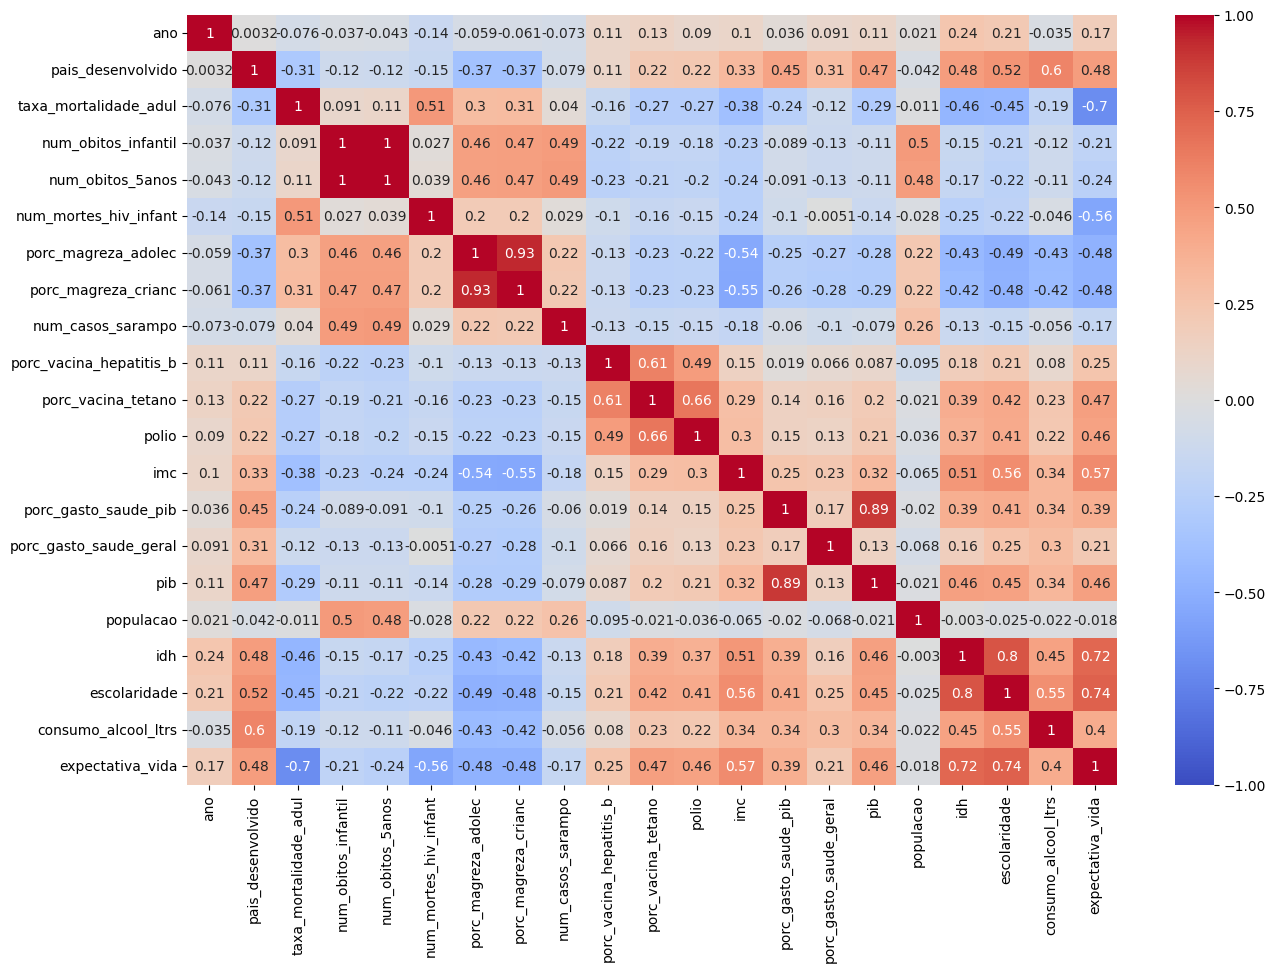

In [330]:
#Pearson
plt.figure(figsize=(15,10))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

<ipython-input-331-1eb4442924ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr('spearman')


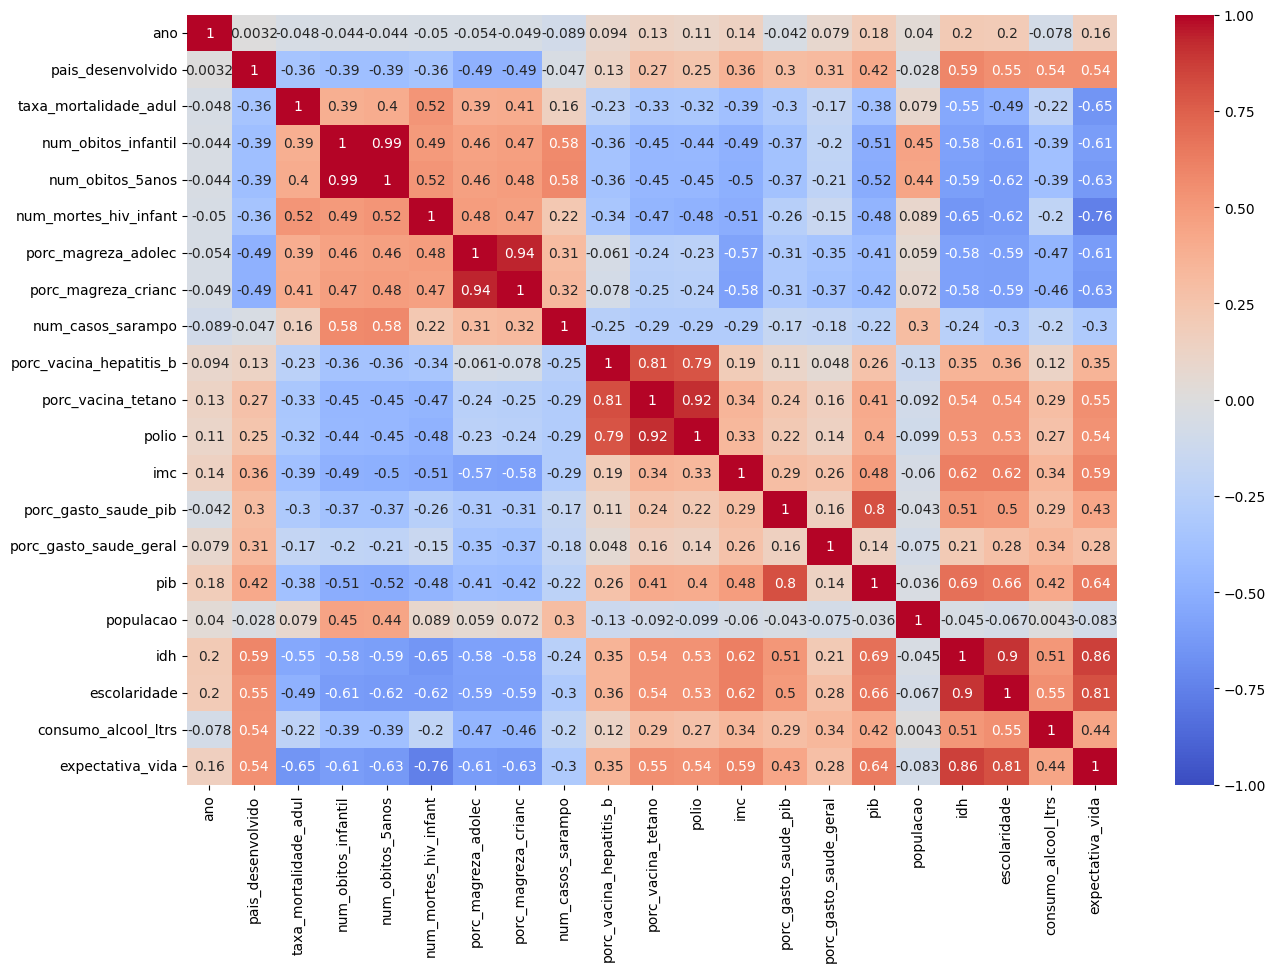

In [331]:
#spearman
plt.figure(figsize=(15,10))
corr_matrix = df_train.corr('spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [332]:
sns.set_style('darkgrid')
#sns.set_palette('RdYlBu')
sns.set_context('paper')

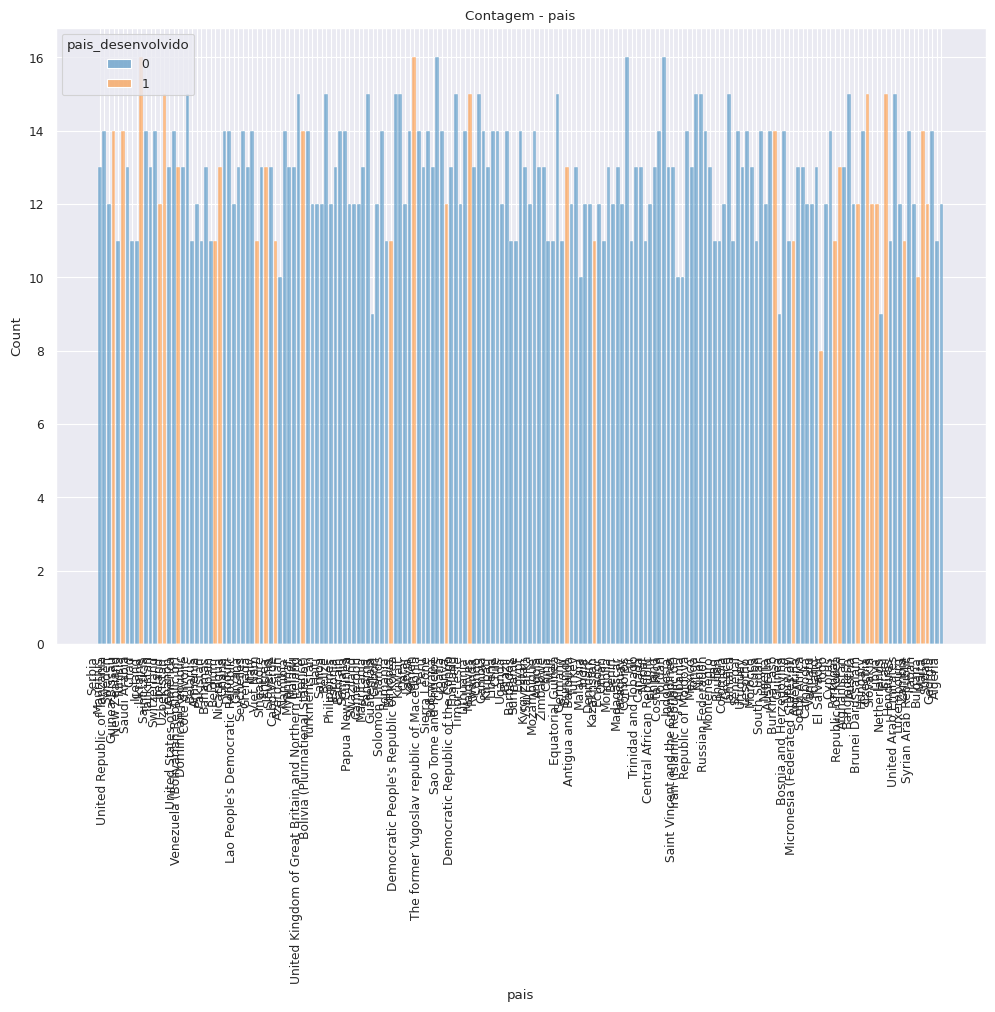

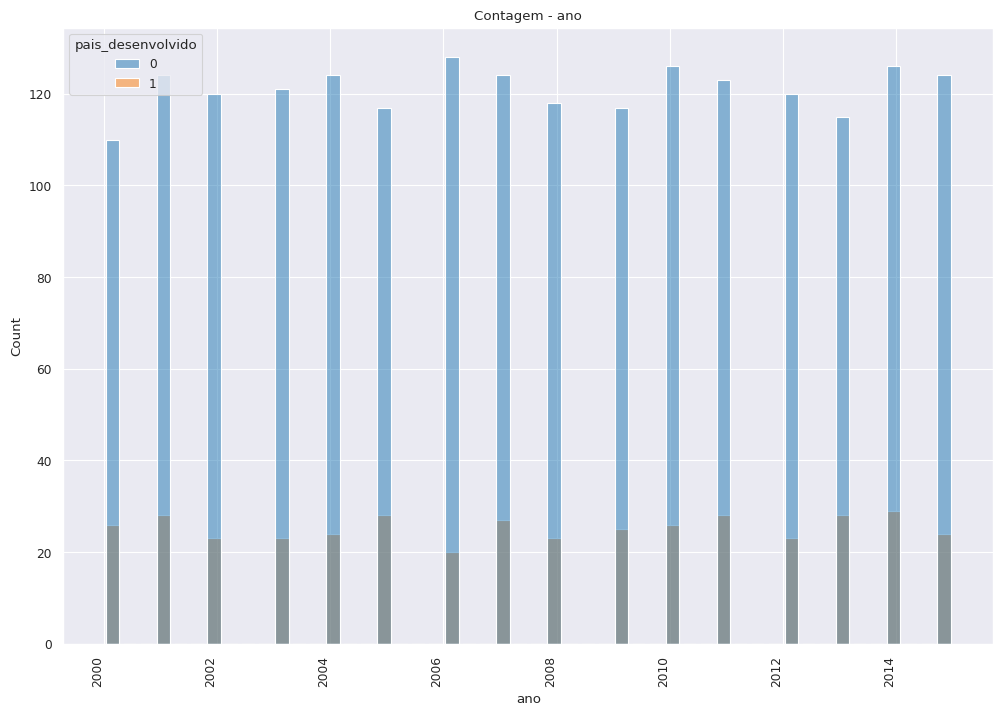

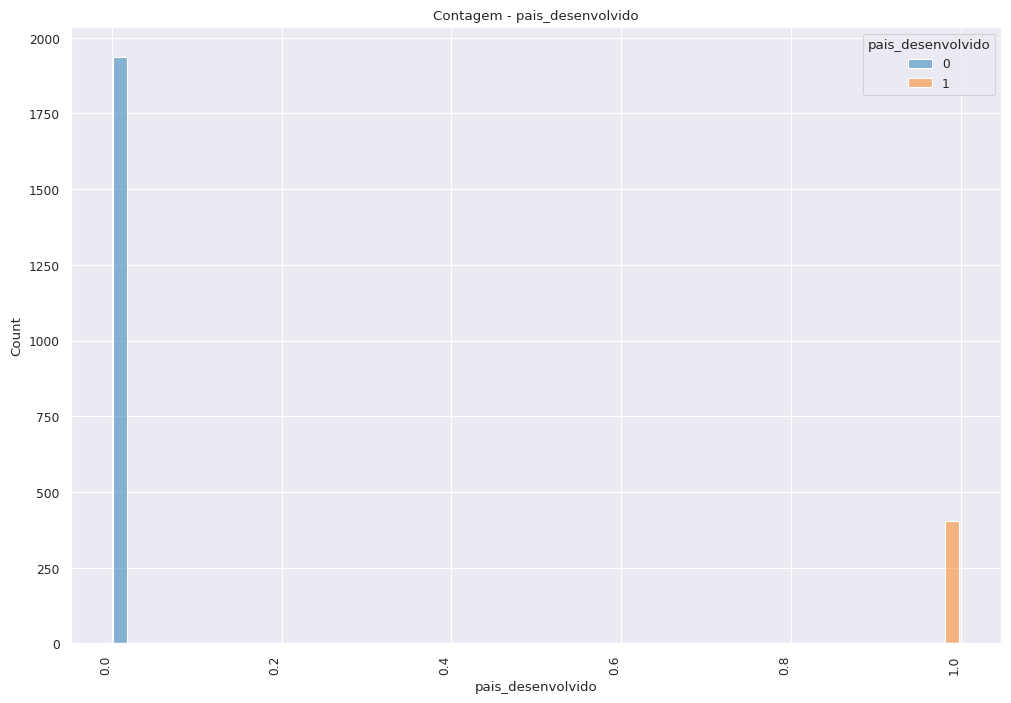

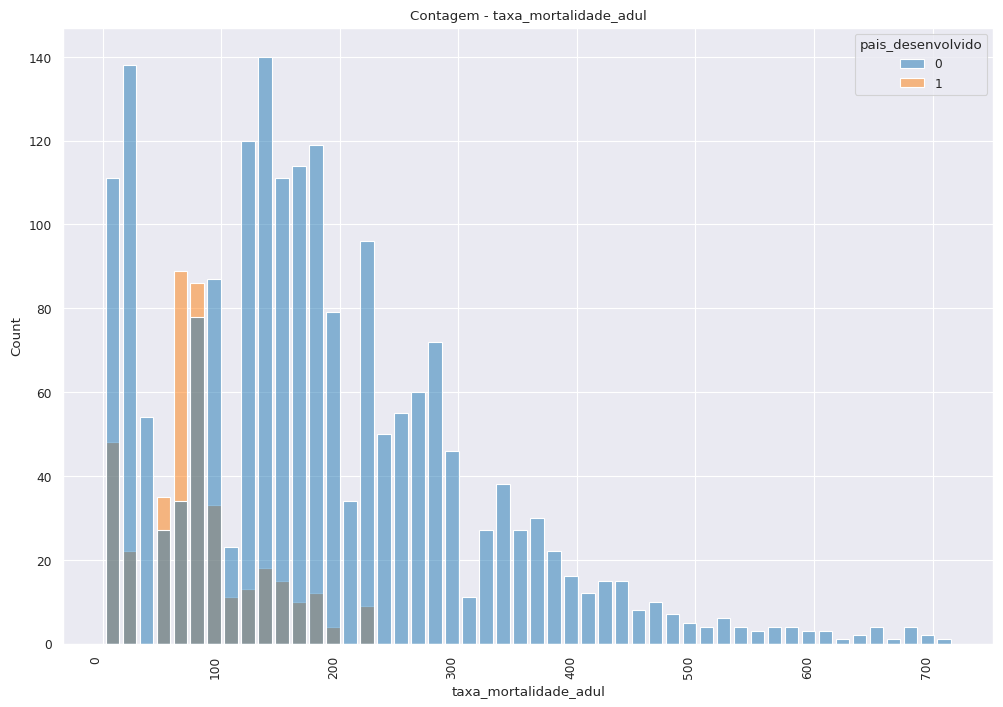

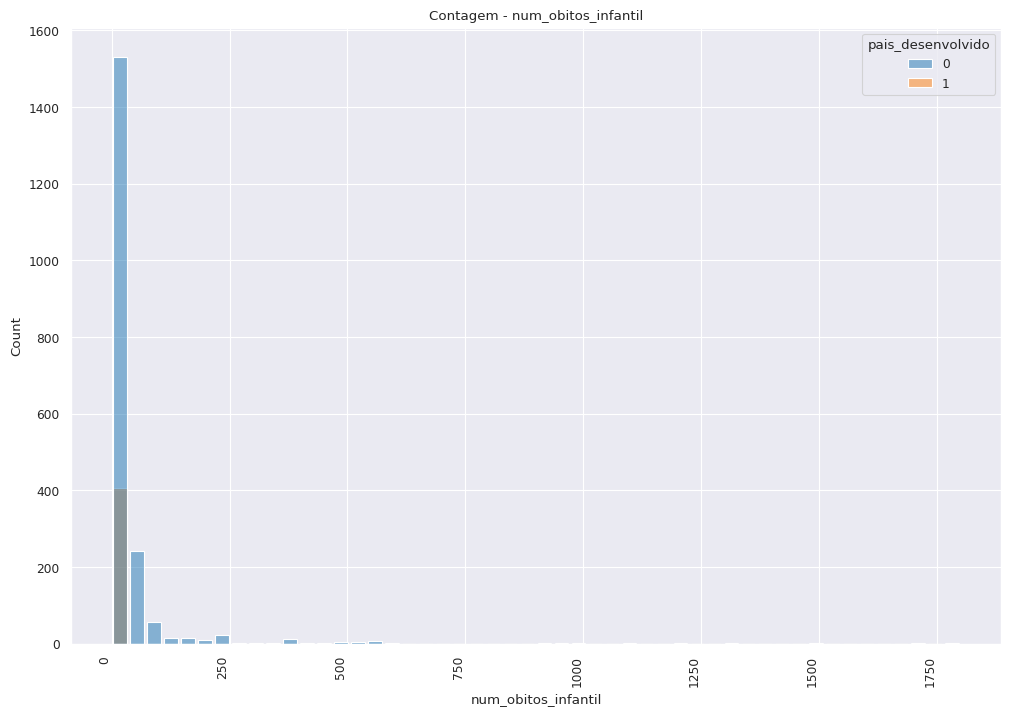

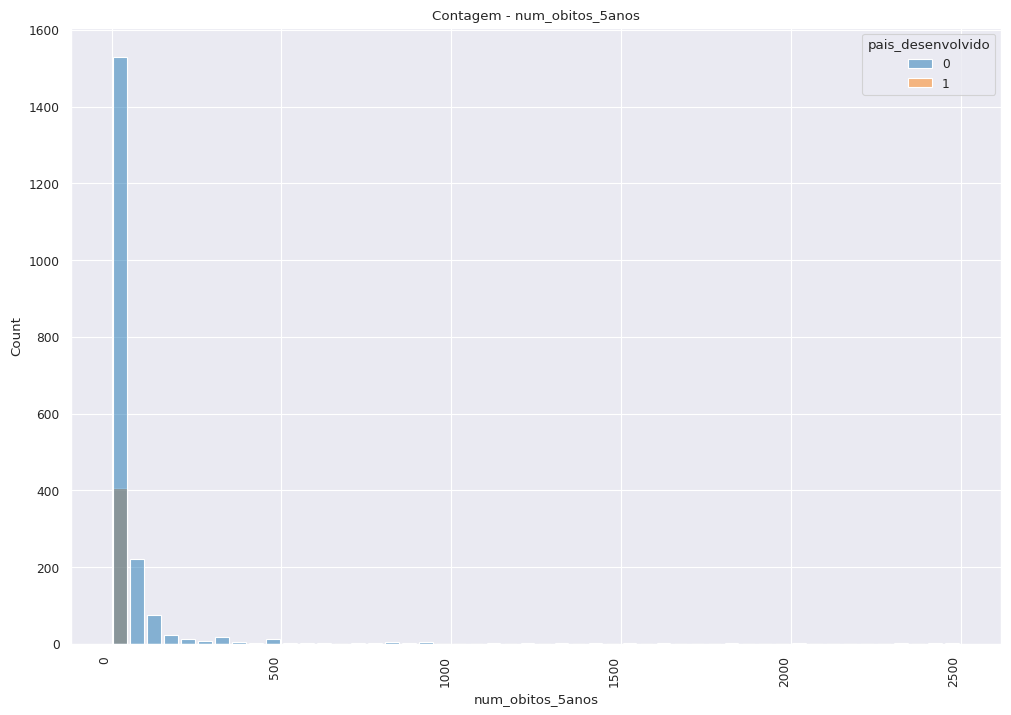

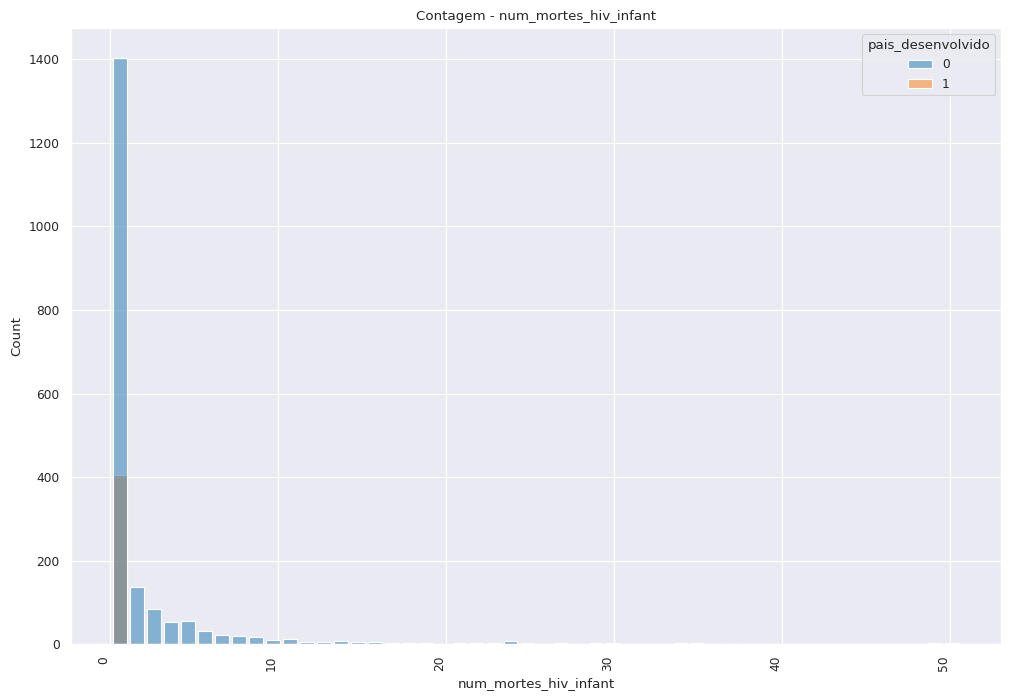

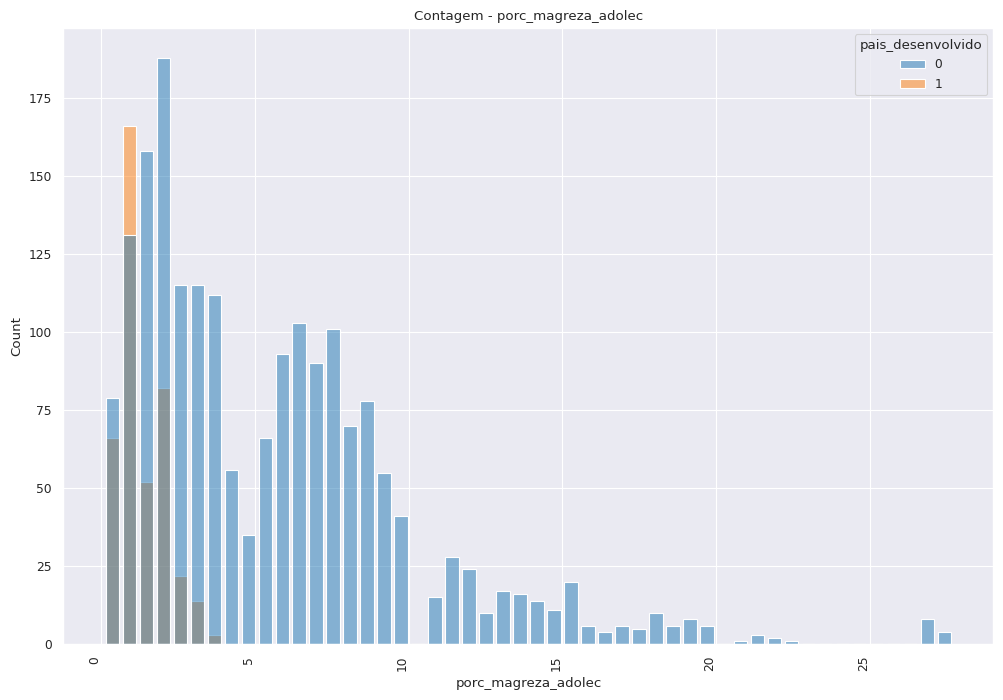

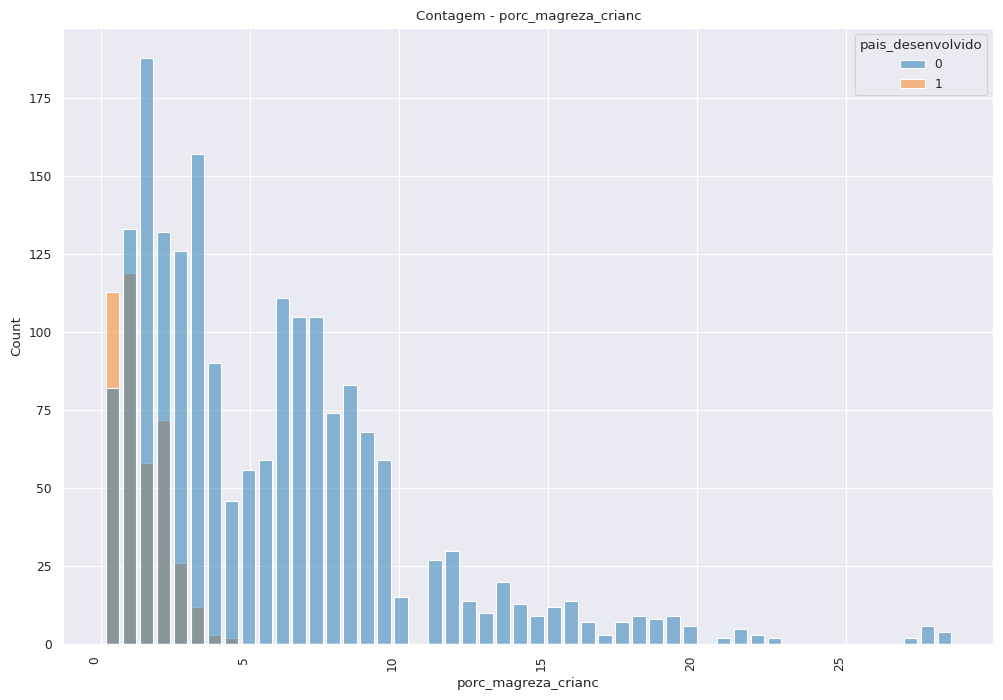

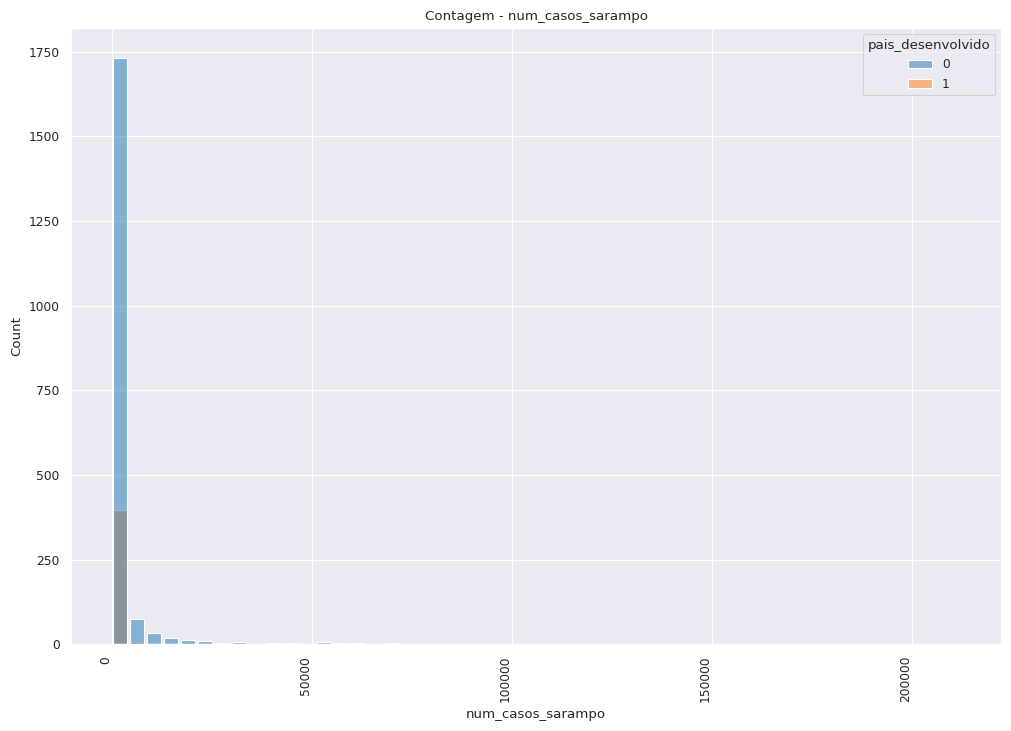

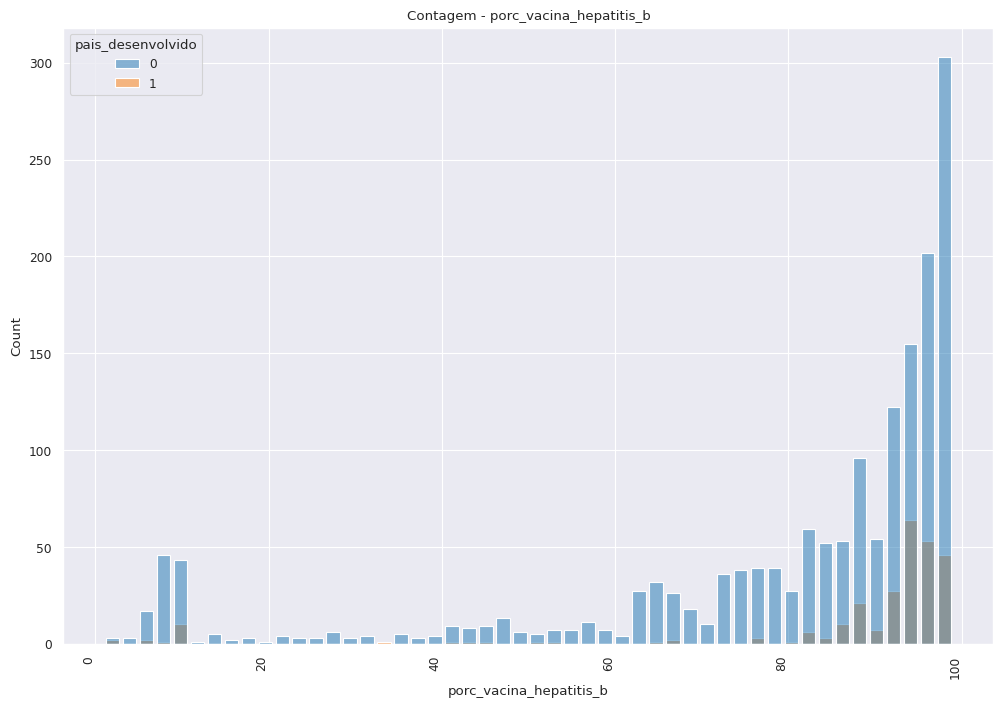

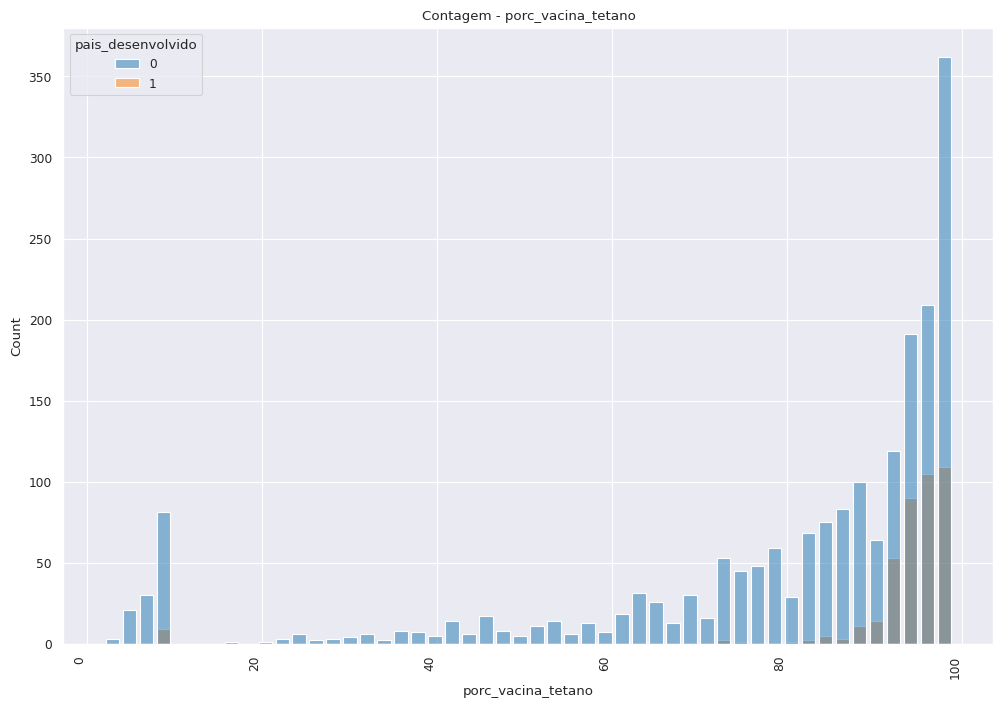

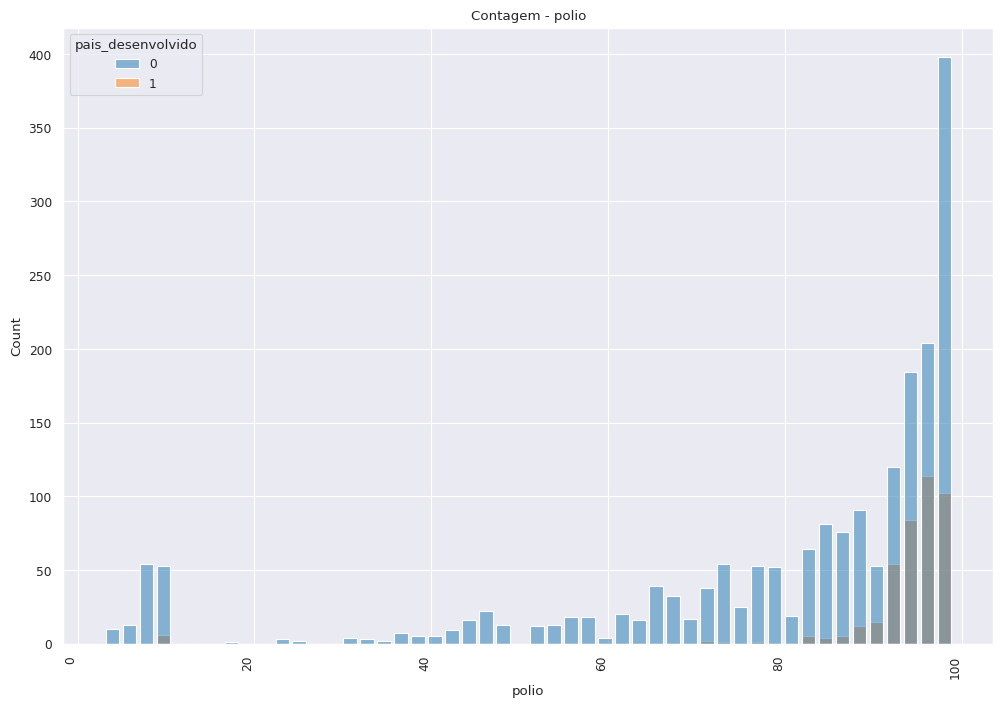

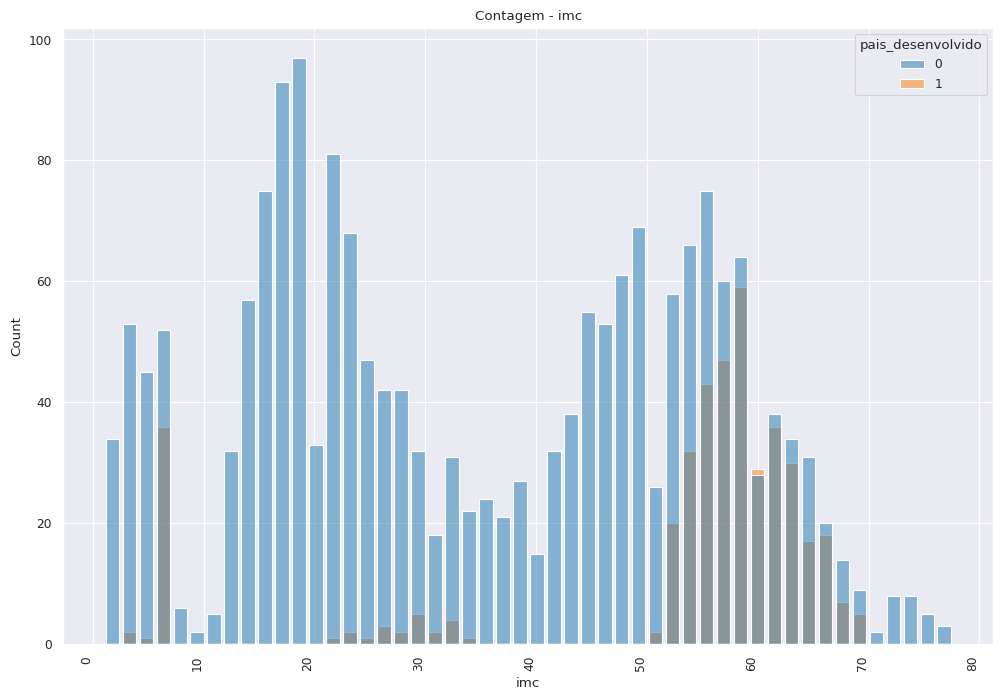

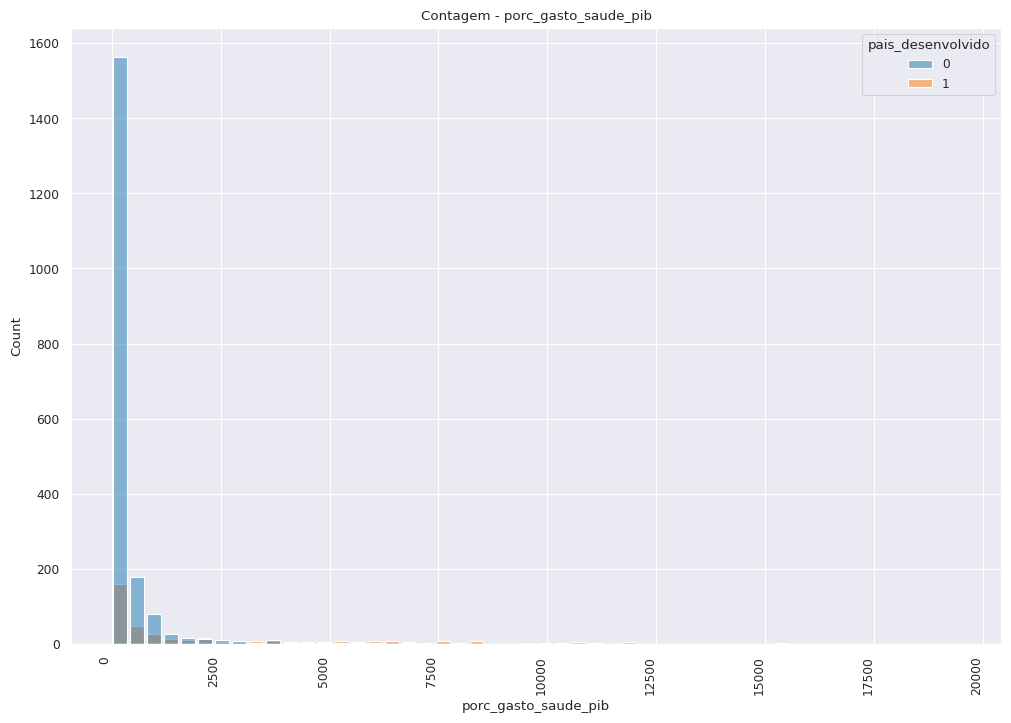

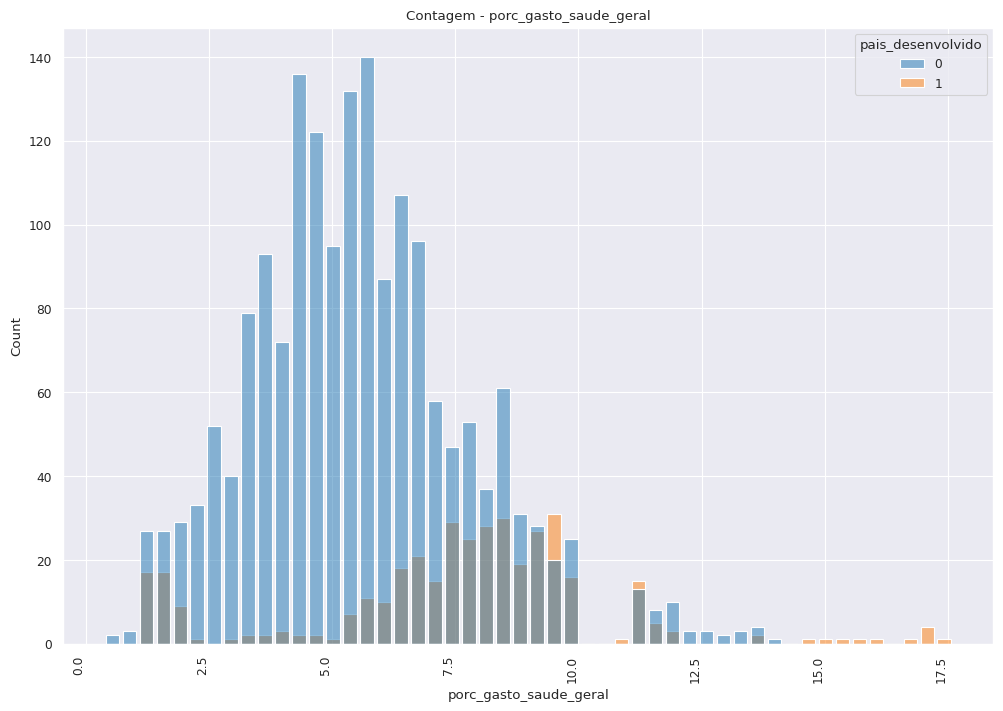

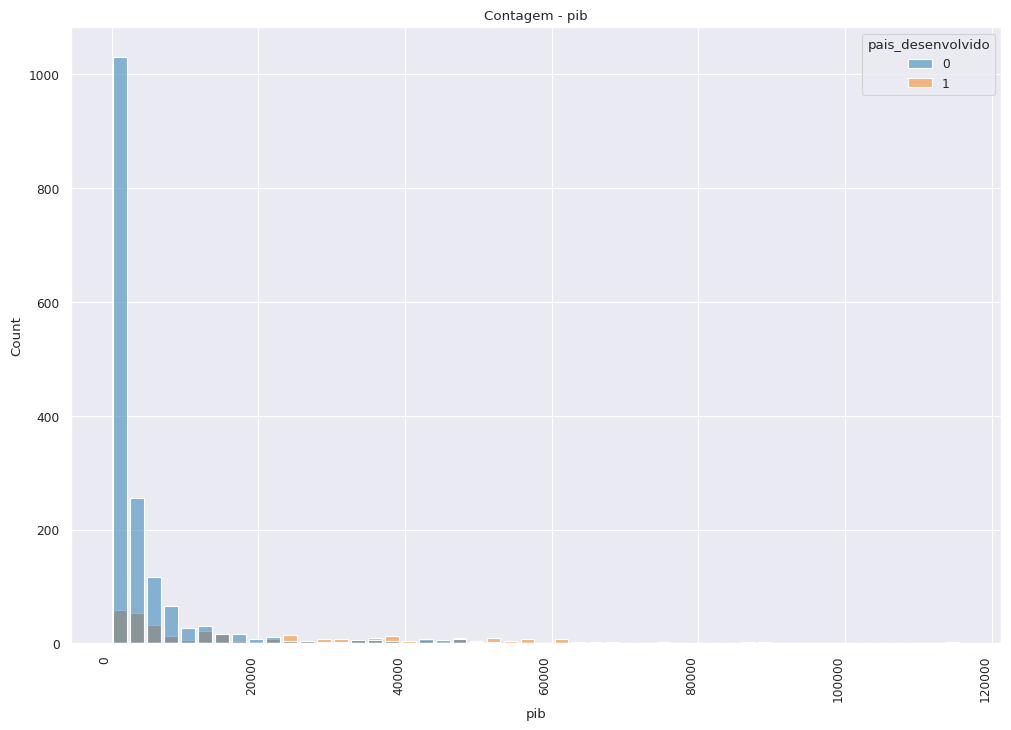

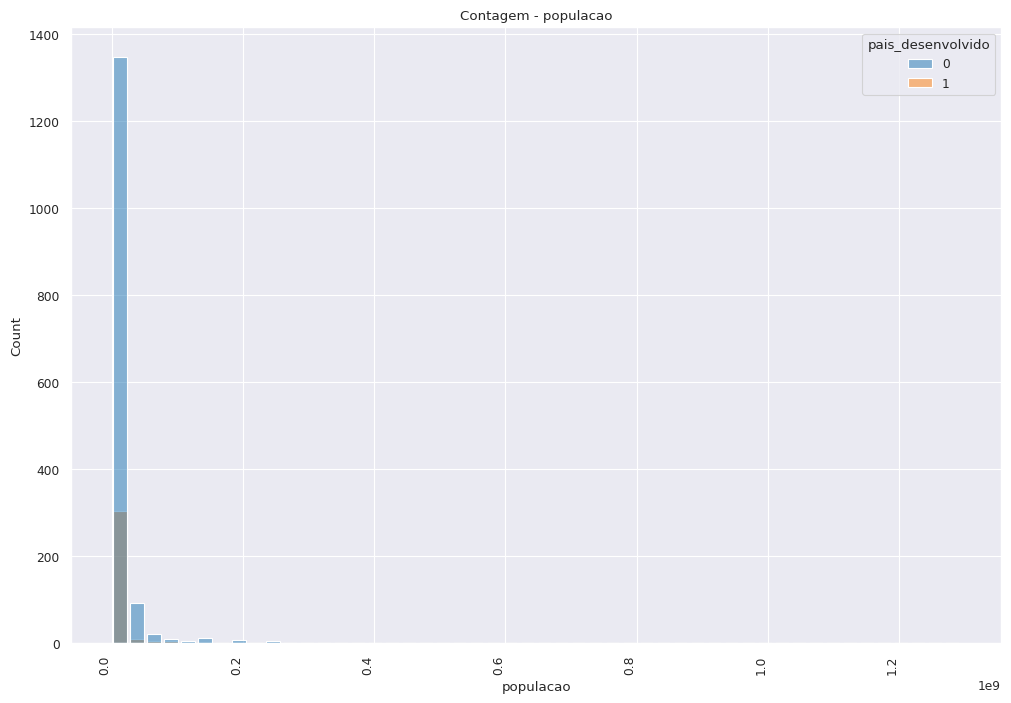

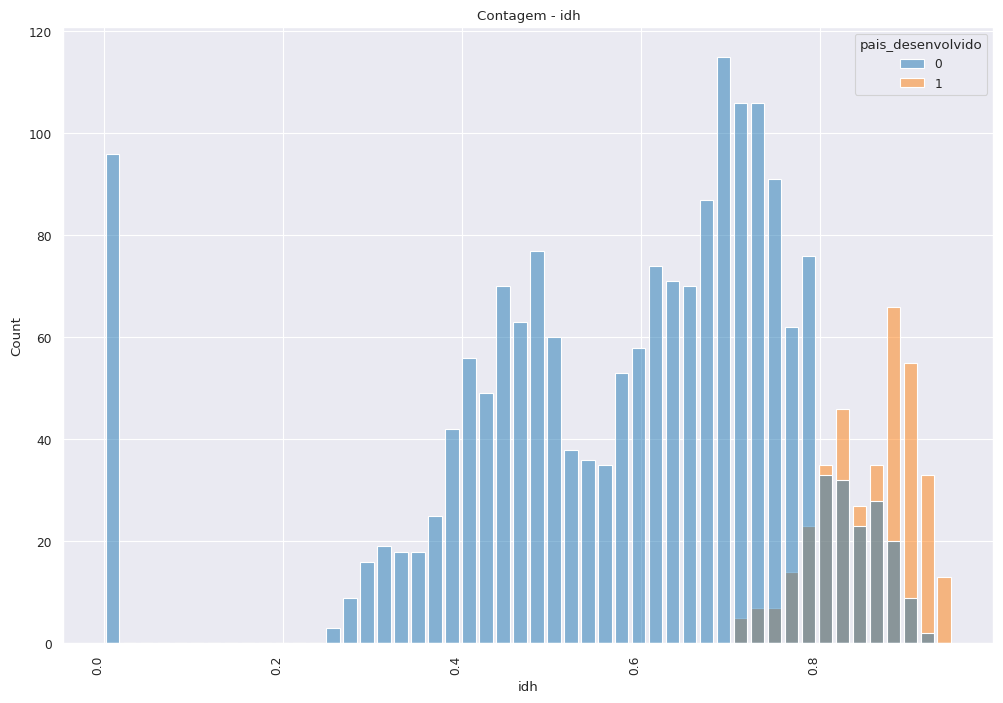

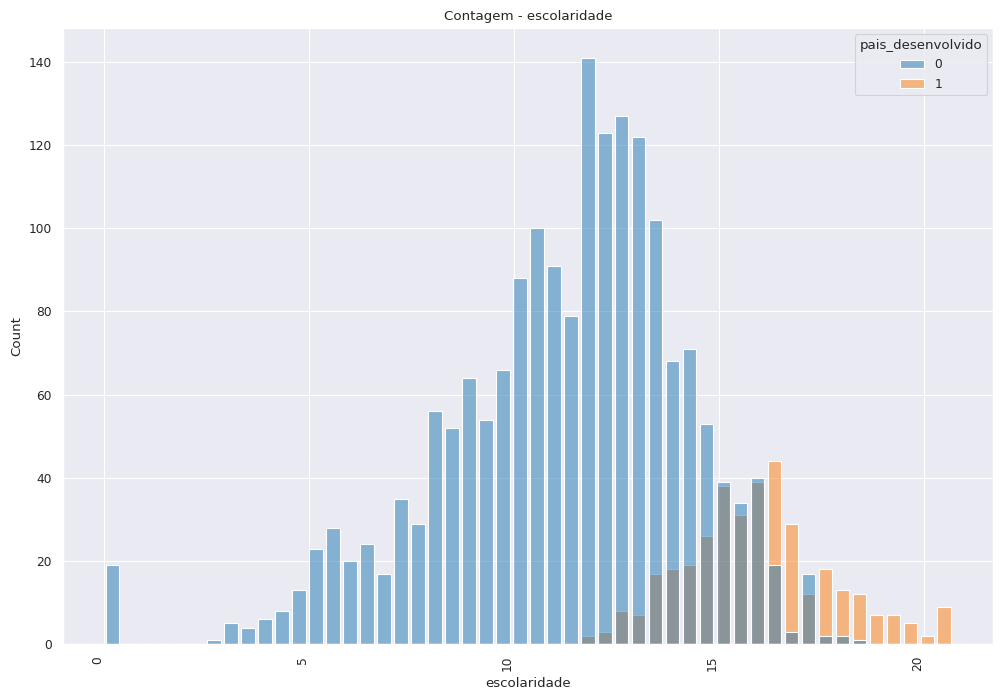

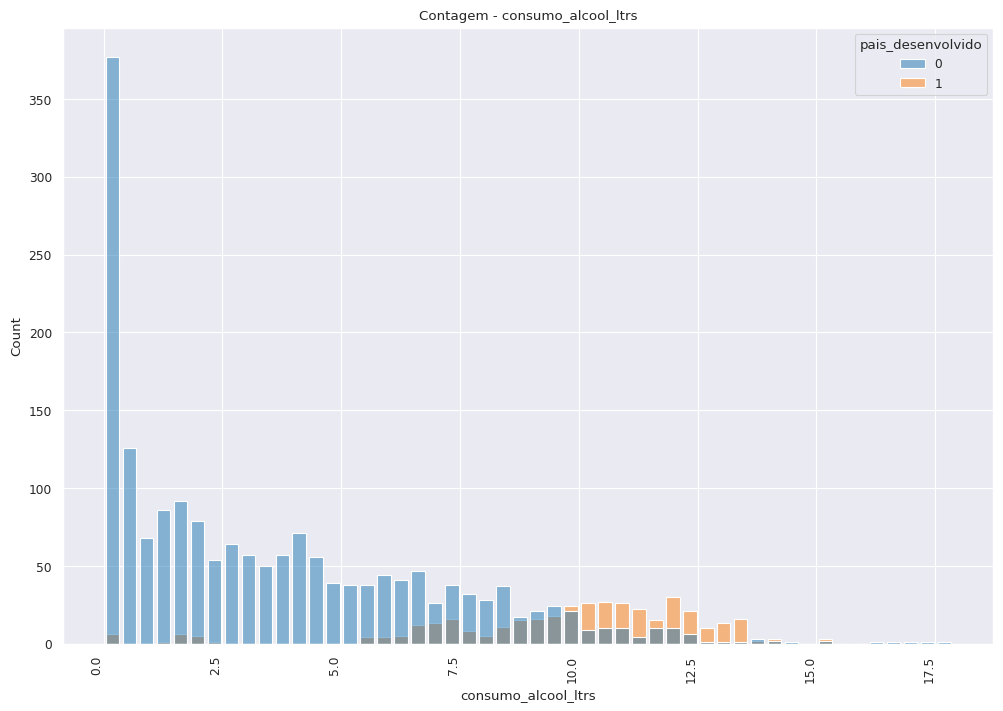

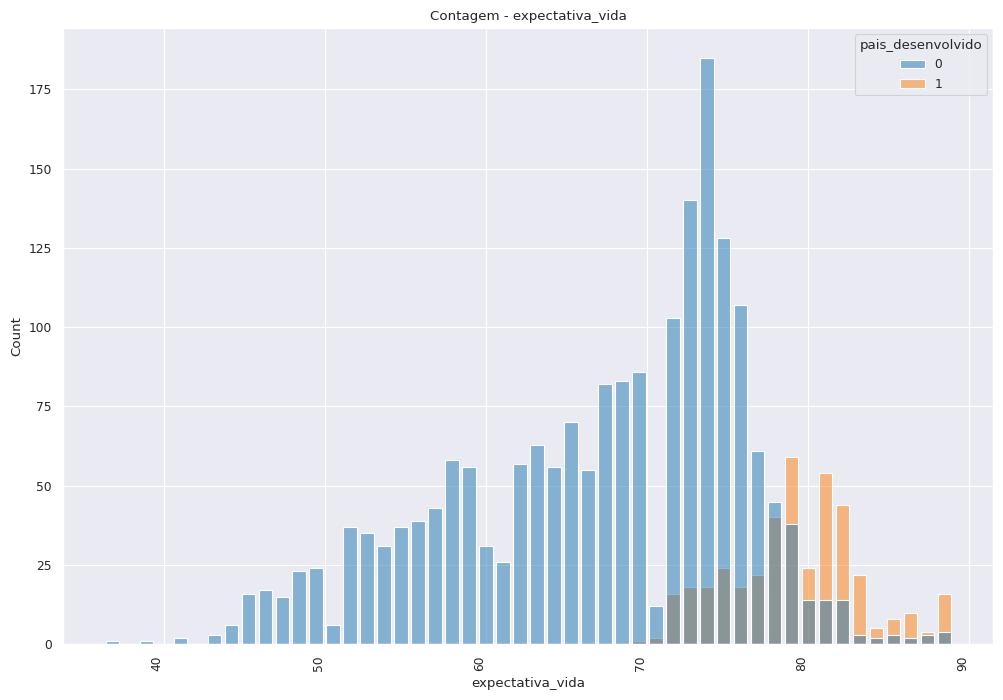

In [333]:
a = df_train.sample(10)
for col in cols:
  plt.figure(figsize=(12,8))
  sns.histplot(df_train, x=col, hue='pais_desenvolvido', bins=50, shrink=0.8)
  plt.title('Contagem - ' + col)
  plt.xticks(rotation=90, ha='right')
  plt.show()

In [334]:
'''sns.pairplot(df_train, dropna=False)
plt.show()'''

'sns.pairplot(df_train, dropna=False)\nplt.show()'

# MVP
Todas as Features com fill na 0

## Avaliação do Modelo

In [335]:
def separacao_treino_teste(df_treino, df_teste, colunas):
  x_treino = df_treino[colunas].fillna(0)
  y_treino = df_treino['expectativa_vida']
  x_teste = df_teste[colunas].fillna(0)
  y_teste = df_teste['expectativa_vida']
  return x_treino, y_treino, x_teste, y_teste

In [336]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def escalar_dados(df_treino, df_teste):
  sc = StandardScaler()
  cols = df_treino.columns
  for col in cols:
    df_treino[col] = sc.fit_transform(df_treino[[col]])
    df_teste[col] = sc.transform(df_teste[[col]])
  return df_treino, df_teste

def avaliacao(x_treino, y_treino, x_teste, y_teste ):
  print('Escalonar os dados...')
  x_treino, x_teste = escalar_dados(x_treino, x_teste)
  
  reg = LinearRegression()
  print('Avaliando Regressão Lienar...')
  mol_reg = cross_val_score(reg, x_treino, y_treino, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
  print('Treinando Modelo Final...')
  reg_test = LinearRegression()
  reg_test.fit(x_treino, y_treino)
  pred = reg_test.predict(x_teste)
  metrica = mean_squared_error(pred, y_teste)
  print('Treino - Score da Regressão Linear - ', -mol_reg.mean())
  print('Teste - Score da Regressão Linear - ', metrica)
  return reg_test

In [337]:
colunas = ['ano','pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'pib', 'populacao', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train, df_test, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  19.22876449853604
Teste - Score da Regressão Linear -  18.05963821312008


# Remoção de Colunas não informativas
- Ano
- População (muitos nulos)
- PIB (redundante com gastos com saude)

In [338]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib',]
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train, df_test, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  19.283519395957192
Teste - Score da Regressão Linear -  18.03400464664857


# Imputar dados com a média

In [339]:
df_train_input = df_train.fillna(df_train.mean())
df_test_input = df_train.fillna(df_train.mean())

<ipython-input-339-1b03bb461c39>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_input = df_train.fillna(df_train.mean())
<ipython-input-339-1b03bb461c39>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_input = df_train.fillna(df_train.mean())


In [340]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib', 'porc_vacina_hepatitis_b', 'num_casos_sarampo','imc', 'num_obitos_5anos', 'polio', 'porc_gasto_saude_geral',
       'porc_vacina_tetano', 'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.941200892095186
Teste - Score da Regressão Linear -  16.516225942645125


# Engenharia de Variaveis

## Cobertura Vacinal
- Grande correlação entre as vacinas
- Agrupar as vacinas em uma unica variavel

In [341]:
df_train_input['cobertura_vacinal'] =  df_train_input['polio']**2 + df_train_input['porc_vacina_tetano']**3 +   (df_train_input['porc_vacina_hepatitis_b']*10)
df_test_input['cobertura_vacinal'] =   df_test_input['polio']**2 + df_test_input['porc_vacina_tetano']**3   +   (df_test_input['porc_vacina_hepatitis_b']*10)

In [342]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul', 'num_obitos_infantil', 'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'num_obitos_5anos', 'porc_gasto_saude_geral',
        'num_mortes_hiv_infant', 'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade','pib',
        'cobertura_vacinal']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.603643791155683
Teste - Score da Regressão Linear -  16.24810368174533


## Mortes Infantil

In [343]:
df_train_input['morte_infantil'] =  (df_train_input['num_obitos_infantil'] + df_train_input['num_obitos_5anos'])**2
df_test_input['morte_infantil'] =   (df_test_input['num_obitos_infantil'] + df_test_input['num_obitos_5anos'])**2

In [344]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec', 'porc_magreza_crianc', 'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant','pib',
        'cobertura_vacinal', 'morte_infantil']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.460739370003925
Teste - Score da Regressão Linear -  16.089534283236393


## Magreza

In [345]:
colunas = ['pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec',  'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant','pib',
        'cobertura_vacinal', 'morte_infantil']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.447127038129192
Teste - Score da Regressão Linear -  16.08979442008492


## Teste

In [346]:
df_train_input['pib_penalizado'] = df_train_input['pib']  / (df_train_input['num_obitos_5anos'] + df_train_input['porc_magreza_adolec'] + df_train_input['taxa_mortalidade_adul'])
df_test_input['pib_penalizado'] = df_test_input['pib']  / (df_test_input['num_obitos_5anos'] + df_test_input['porc_magreza_adolec'] + df_test_input['taxa_mortalidade_adul'])

In [347]:
colunas = ['pib','pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
       'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
        'porc_magreza_adolec',  'idh', 'escolaridade',
        'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant',
        'cobertura_vacinal', 'morte_infantil', 'pib_penalizado']
       
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.422576745655356
Teste - Score da Regressão Linear -  16.065362550923382


In [348]:
 def altera_pesos(df_train_input,df_test_input):
  df_train_input['neg'] = df_train_input['taxa_mortalidade_adul']*1.7 + df_train_input['num_mortes_hiv_infant']*1.55 + df_train_input['porc_magreza_adolec']*1.5 +df_train_input['porc_magreza_crianc']*1.5
  df_train_input['pos'] = df_train_input['porc_vacina_tetano']*1.5+df_train_input['polio']*1.5 + df_train_input['imc']*1.6 +df_train_input['porc_gasto_saude_pib']*1.4+df_train_input['pib']*1.4+df_train_input['idh']*1.7+df_train_input['escolaridade']*1.7

  df_test_input['neg'] = df_test_input['taxa_mortalidade_adul']*1.7 +df_test_input['num_mortes_hiv_infant']*1.55 + df_test_input['porc_magreza_adolec']*1.5 +df_test_input['porc_magreza_crianc']*1.5
  df_test_input['pos'] = df_test_input['porc_vacina_tetano']*1.5+df_test_input['polio']*1.5 + df_test_input['imc']*1.6 +df_test_input['porc_gasto_saude_pib']*1.4+df_test_input['pib']*1.4+df_test_input['idh']*1.7+df_test_input['escolaridade']*1.7
  return df_train_input, df_test_input

 def avaliacao(x_treino, y_treino, x_teste, y_teste ):
  print('Escalonar os dados...')
  x_treino, x_teste = escalar_dados(x_treino, x_teste)
  x_treino, x_teste = altera_pesos(x_treino,x_teste)
  
  reg = LinearRegression()
  print('Avaliando Regressão Lienar...')
  mol_reg = cross_val_score(reg, x_treino, y_treino, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
  print('Treinando Modelo Final...')
  reg_test = LinearRegression()
  reg_test.fit(x_treino, y_treino)
  pred = reg_test.predict(x_teste)
  metrica = mean_squared_error(pred, y_teste)
  print('Treino - Score da Regressão Linear - ', -mol_reg.mean())
  print('Teste - Score da Regressão Linear - ', metrica)
  return reg_test

In [349]:
colunas = ['pib','pais_desenvolvido',  'taxa_mortalidade_adul',  'consumo_alcool_ltrs',
    'porc_gasto_saude_pib',  'num_casos_sarampo','imc', 'porc_gasto_saude_geral',
    'porc_magreza_adolec',  'idh', 'escolaridade', 'porc_magreza_crianc',
    'num_obitos_infantil', 'num_obitos_5anos', 'num_mortes_hiv_infant', 'porc_vacina_tetano', 'polio',
    'cobertura_vacinal', 'morte_infantil', 'pib_penalizado']
    
x_treino, y_treino, x_teste, y_teste = separacao_treino_teste(df_train_input, df_test_input, colunas)
reg = avaliacao(x_treino, y_treino, x_teste, y_teste)   

Escalonar os dados...
Avaliando Regressão Lienar...
Treinando Modelo Final...
Treino - Score da Regressão Linear -  16.31252642295986
Teste - Score da Regressão Linear -  15.91501298691165


## Escolha de Modelo

### escolhido um modelo qualquer sem nenhum tuning de parametro

# Apenas no final de tudo aplica a predição no y_test:

In [ ]:
reg.fit(X_train_selected, y_train)
y_predict = reg.predict(X_test_selected)
y_predict

In [ ]:
mean_squared_error(y_predict, y_test)

### Erro Quadrático Médio obtido: 69,66 anos

## Este notebook tem um modelo muito simples. 
## A idéia deste projeto é cada conjunto de equipes partir deste notebook e aprofundar **apenas** em uma das etapas:
### - Tratamento de dados
### - Criação de novas features
### - seleção das features
### - comparação entre modelos
### - tuning do modelo 

## Para entender o efeito de cada etapa nessa base específica (utilizando a métrica escolhida).
## Posteriormente será juntada todas as etapas para ver o efeito conjunto.